In [2]:
"""
Code for accommodating the graph-making need of ECON 3229-2 Money, Banking, and Financial Systems 

University of Missouri-Columbia

Fangda Wang

Fall 2017


https://github.com/vitanova
"""

# I work as teaching assistant for this course, and am told to generate/update lots of figures of macroeconomic
# and monetary time series, mainly from the FRED:
# https://fred.stlouisfed.org/
# although the website has the functionality to plot figures, it's elementary and cannot satisify this course's demand
# and, I am tired of handling excel, since each time I have to build the procedure from the begining
# moreover, there are a number of similar tasks in the foreseeable future, so I decide to write some code 
# to automize the procedure, before it is too late

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#this is a third-party api for manipulating fred data
from fred import Fred

#first, use the api key to get access to fred, all data in dictionary format
#replace with your own key
fr = Fred(api_key='4bba000775edea91bc01729d217cf3da', response_type='dict')

#now, use the series id to get observations
cpi=fr.series.observations(series_id="BNKTTLA641N") ## <--- make change: series_id
aaa=fr.series.observations(series_id="MICH") ## <--- make change
nber=fr.series.observations(series_id="USREC") ## <--- make change

#convert the dictionary data to data frame
CPI=pd.DataFrame.from_dict(cpi)
AAA=pd.DataFrame.from_dict(aaa)
NBER=pd.DataFrame.from_dict(nber)

#rename columns
CPI.columns = 'date', 'end', 'start', 'cpi' ## <--- make change: series_name
AAA.columns = 'date', 'end', 'start', 'mich' ## <--- make change
NBER.columns = 'date', 'end', 'start', 'nber'## <--- make change

#merge the two tables and use date as key
al=pd.merge(CPI, AAA, how='left', on='date')
al=pd.merge(al, NBER, how='left', on='date')
al=al.drop('end_x', axis=1)
al=al.drop('start_x', axis=1)
al=al.drop('end_y', axis=1)
al=al.drop('start_y', axis=1)
al=al.drop('end', axis=1)
al=al.drop('start', axis=1)

al.head()

C:\Anaconda3\lib\site-packages\fred\helpers\__init__.py:36: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  frame = frame.convert_objects(convert_numeric=True)
C:\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


,date,cpi,mich,nber
0,1934-01-01,9,NaN,0
1,1935-01-01,25,NaN,0
2,1936-01-01,69,NaN,0
3,1937-01-01,75,NaN,0
4,1938-01-01,74,NaN,1


In [3]:
def get_year(x):
    return x.year
al['n_date']=al.apply(lambda row: get_year(row['date']), axis=1)
al=al.rename(columns={'cpi': 'bank_fail'})
al.head()

,date,bank_fail,mich,nber,n_date
0,1934-01-01,9,NaN,0,1934
1,1935-01-01,25,NaN,0,1935
2,1936-01-01,69,NaN,0,1936
3,1937-01-01,75,NaN,0,1937
4,1938-01-01,74,NaN,1,1938


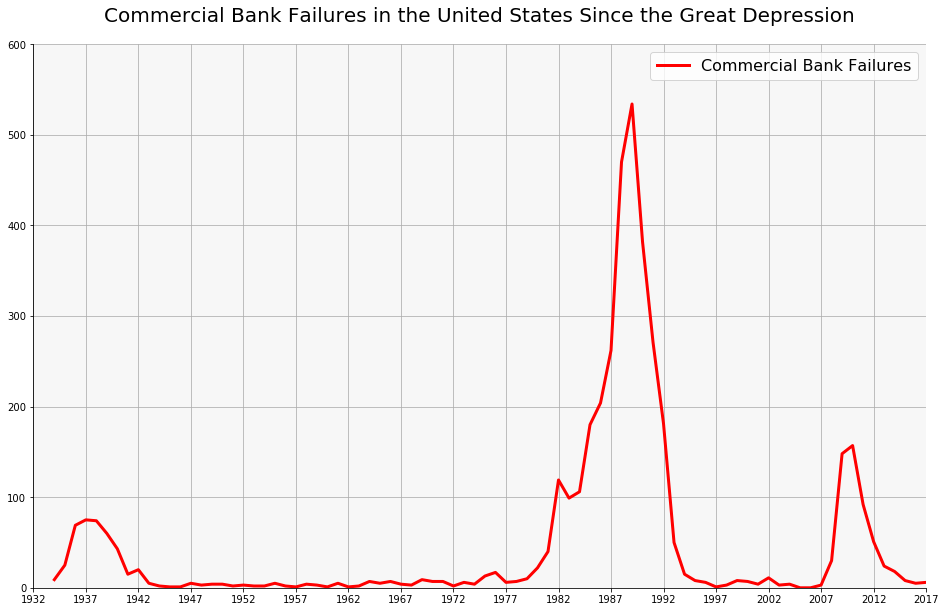

In [4]:
fig, ax=plt.subplots(figsize=(16, 10))
ax.plot(al['n_date'], al['bank_fail'], label='Commercial Bank Failures', linewidth=3, color='red')
ax.legend(loc='best', fontsize=16)
ax.set_ylim(0, 600)
x=np.linspace(1932, 2017, 18)
ax.set_xlim(1932, 2017)
ax.set_xticks(x)
ax.set_title("Commercial Bank Failures in the United States Since the Great Depression", fontsize=20, position=[.5, 1.03])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.06)
ax.grid()
plt.show()